In [1]:
import numpy as np
import plotly.express as px
import plotly.io as pio
#pio.renderers.default='notebook'
pio.renderers.default="svg"

# Motivation

I find matplotlib (and its more recent incarnation Seaborn) quite unintuitive, so this notebook tests plotly as an alternative.

Benefits:
- Interactive plots
- Zoom plots as desired without additional code
- Hover your mouse over a datapoint to see its value
- Japanese support out-of-the-box

Downsides:
- Interactive plots won't show in github
- Need to change renderer to "svg" or "png" which are not interactive

# Plotly Express with Pandas Dataframe

In [2]:
df = px.data.tips()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


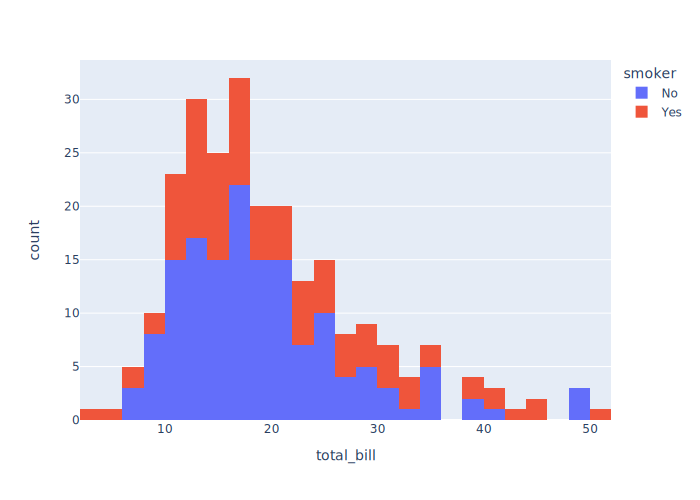

In [4]:
fig = px.histogram(df, x="total_bill", color="smoker")
fig.show()

# Japanese Support

In [5]:
j_df = px.data.tips()
j_df = j_df.rename(columns={"total_bill": "お会計", "tip": "チップ", "sex": "性別", "smoker": "喫煙者"})
j_df["喫煙者"] = j_df["喫煙者"].replace("Yes", "喫")
j_df["喫煙者"] = j_df["喫煙者"].replace("No", "非")

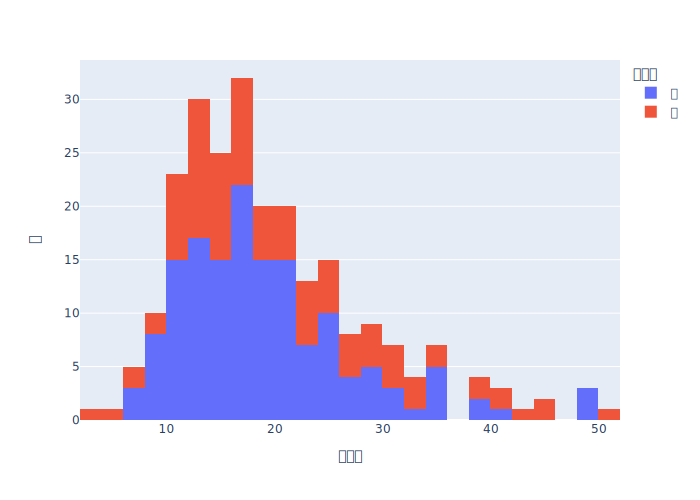

In [6]:
fig = px.histogram(j_df, x="お会計", color="喫煙者")
fig.update_layout(
    yaxis_title="数"
)

# Plotly Express with Lists or Numpy Arrays

Plotly express is a bit like Seaborn, in that it is a bunch of convenience plotting functions adapted for pandas dataframes.

Plotly express is only suited to dataframes, as it automatically names legend entries and axes after dataframe titles. It's a pain to add the names afterward when plotting lists/arrays.

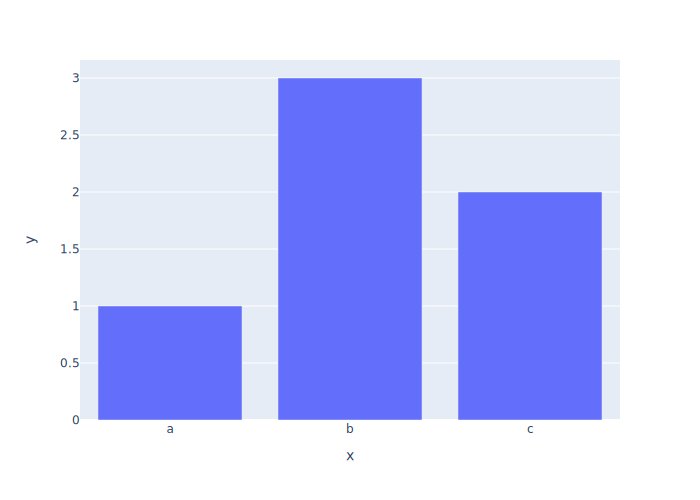

In [7]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [8]:
samples = np.random.normal(10, 1, size=50)

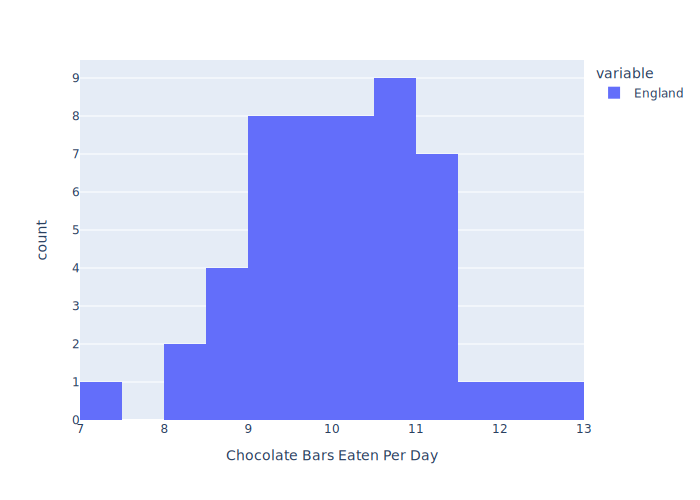

In [9]:
fig = px.histogram(samples)
fig.data[0].name = "England"
fig.update_layout(
    xaxis_title="Chocolate Bars Eaten Per Day"
)
fig.show()

# Plotly Graph Objects API

This makes more sense to me than matplotlib.

In [10]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Multiple Plots

### Probability Histogram

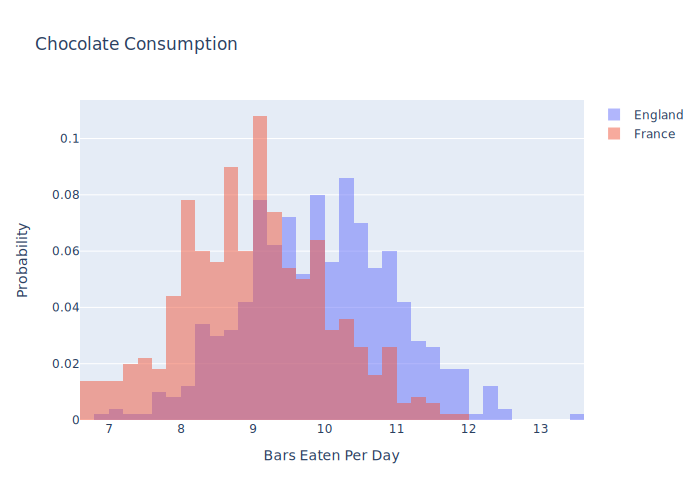

In [11]:
x0 = np.random.normal(10,1,size=500)
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.random.normal(9,1,size=500)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, histnorm="probability", name="England"))
fig.add_trace(go.Histogram(x=x1, histnorm="probability", name="France"))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
# Set labels
fig.update_layout(
    title="Chocolate Consumption",
    xaxis_title="Bars Eaten Per Day",
    yaxis_title="Probability",
)
fig.show()

### Shared number of bins

If probability histograms have different number of bins, they can be hard to compare:

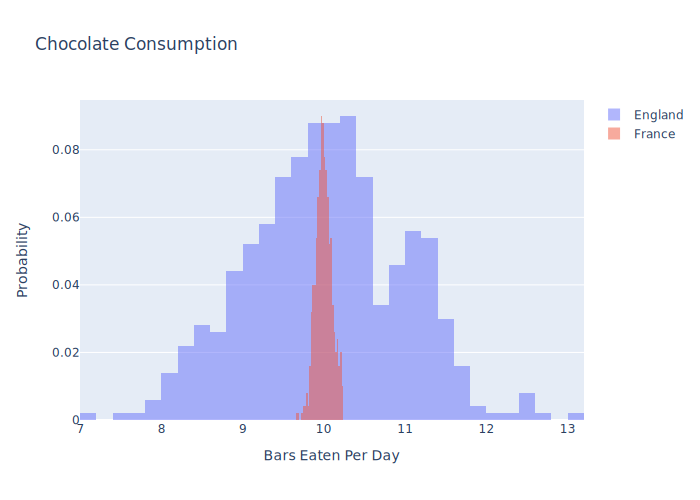

In [12]:
x0 = np.random.normal(10,1,size=500)
x1 = np.random.normal(10,0.1,size=500)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, histnorm="probability", name="England"))
fig.add_trace(go.Histogram(x=x1, histnorm="probability", name="France"))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.update_layout(
    title="Chocolate Consumption",
    xaxis_title="Bars Eaten Per Day",
    yaxis_title="Probability"
)
fig.show()

To fix the above, you can set a bingroup to forse same bins:

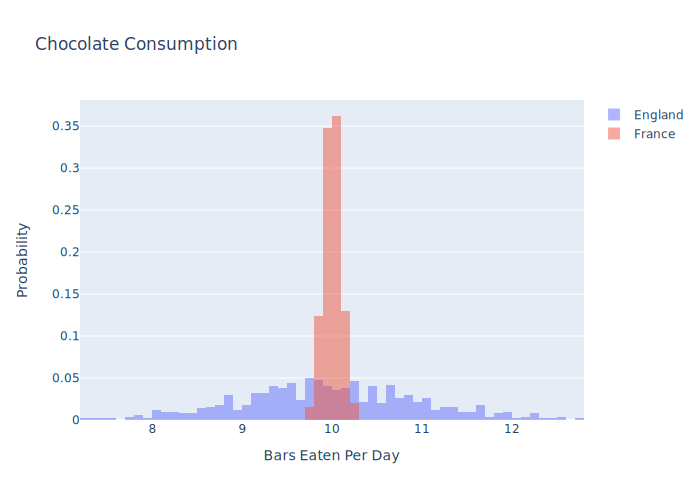

In [13]:
x0 = np.random.normal(10,1,size=500)
x1 = np.random.normal(10,0.1,size=500)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, histnorm="probability", name="England", bingroup=1))
fig.add_trace(go.Histogram(x=x1, histnorm="probability", name="France", bingroup=1))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.update_layout(
    title="Chocolate Consumption",
    xaxis_title="Bars Eaten Per Day",
    yaxis_title="Probability"
)
fig.show()

### Probability Density Histogram

Another way to solve the above problem is to plot probability density instead of probability:

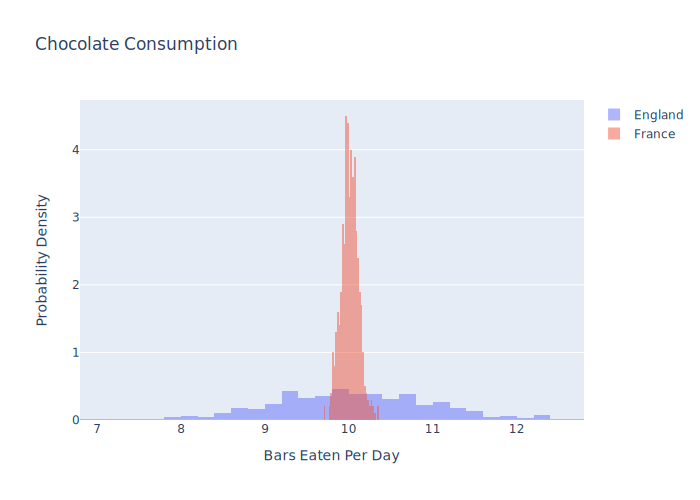

In [14]:
x0 = np.random.normal(10,1,size=500)
x1 = np.random.normal(10,0.1,size=500)

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0, histnorm="probability density", name="England"))
fig.add_trace(go.Histogram(x=x1, histnorm="probability density", name="France"))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.5)
fig.update_layout(
    title="Chocolate Consumption",
    xaxis_title="Bars Eaten Per Day",
    yaxis_title="Probability Density"
)
fig.show()

## Subplots

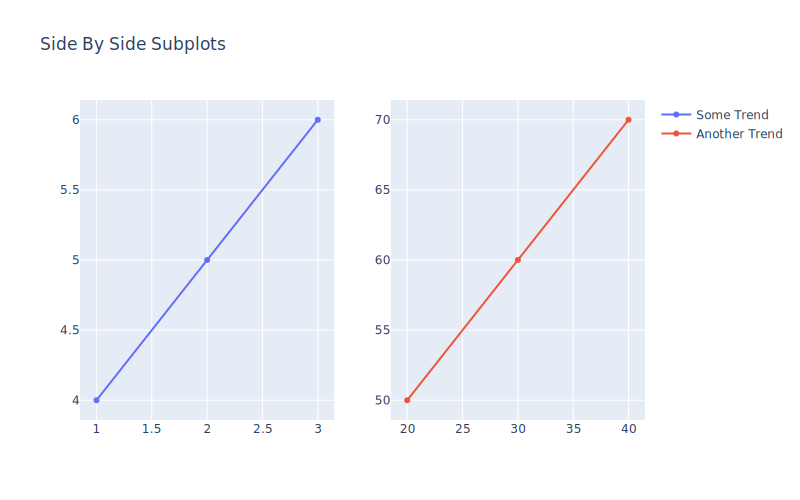

In [15]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(x=[1, 2, 3], y=[4, 5, 6], name="Some Trend"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=[20, 30, 40], y=[50, 60, 70], name="Another Trend"),
    row=1, col=2
)

fig.update_layout(
    title_text="Side By Side Subplots",
    width=800
)
fig.show()